# Úkoly
## Profilování a benchmarking
- pomocí `line_profiler` zjistěte, které části kódu jsou nejvíce výpočetně náročné
    - pro `eps = 1e-100`
- proveďtě benchmarking pomocí `time.time` pro `archimedes_pi` a `newton_pi` pro různé hodnoty `eps`
    - `eps = 1e-1, 1e-2, 1e-3,  ... , 1e-100`
    - výsledky zobrazte pomocí log-log grafu    

In [1]:
from decimal import Decimal as D, getcontext

getcontext().prec = 1000
pi = D("3.141592653589793238462643383279\
5028841971693993\
7510582097494459230781640628620899862803482534\
2117067982148086513282306647093844609550582231\
7253594081284811174502841027019385211055596446\
2294895493038196442881097566593344612847564823\
3786783165271201909145648566923460348610454326\
6482133936072602491412737245870066063155881748\
8152092096282925409171536436789259036001133053\
0548820466521384146951941511609433057270365759\
5919530921861173819326117931051185480744623799\
6274956735188575272489122793818301194912983367\
3362440656643086021394946395224737190702179860\
9437027705392171762931767523846748184676694051\
3200056812714526356082778577134275778960917363\
7178721468440901224953430146549585371050792279\
6892589235420199561121290219608640344181598136\
2977477130996051870721134999999837297804995105\
9731732816096318595024459455346908302642522308\
2533446850352619311881710100031378387528865875\
3320838142061717766914730359825349042875546873\
1159562863882353787593751957781857780532171226\
806613001927876611195909216420199")

def odmocnina(a, eps):
    x = a
    while abs(x**2 - a) > eps**2:
        x = (a / x + x) / 2
    return x


def archimedes_pi(eps):
    vyska = odmocnina(D(1) - (D(1) / D(2))**2, eps)
    zakladna = D(1)
    i = 1
    while True:
        zakladna = odmocnina((zakladna / 2)**2 + (1 - vyska)**2, eps)
        vyska = odmocnina(1 - (zakladna / 2)**2, eps)
        odhad_pi = 6 * (2**i) * zakladna * (vyska / 2)
        i += 1
        if abs(odhad_pi - pi) < eps:
            break
    return odhad_pi


def newton_pi(eps):
    a = D(0.5) * (D(1) / (2**3))
    pi_suma = D(1 / D(2 * 1 + 1)) * a
    pi_zbytek = ((-1) * odmocnina(D(3), eps)) / D(8) + D(1) / D(2)
    i = D(2)
    while True:
        a *= (D(2 * i - 3) / D(2 * i)) * D(1 / 4)
        pi_suma += (D(1) / D(2 * i + 1)) * a
        odhad_pi = 12 * (pi_zbytek - pi_suma)
        if abs(odhad_pi - pi) < eps:
            break
        i += 1
    return odhad_pi

eps = 1e-100
pi_odhad1 = archimedes_pi(eps)
pi_odhad2 = newton_pi(eps)

print(f"Pi podle Archimedova algoritmu s chybou {abs(pi - pi_odhad1):.4e}")
print(f"Pi podle Newtonova algoritmu s chybou {abs(pi - pi_odhad2):.4e}")

Pi podle Archimedova algoritmu s chybou 6.5629e-101
Pi podle Newtonova algoritmu s chybou 2.6776e-101


In [ ]:
%load_ext line_profiler

In [16]:
%lprun -f archimedes_pi -f archimedes_pi(eps)

/home/fei/pah0008/VVP/.venv/lib/python3.10/site-packages/line_profiler/ipython_extension.py:97: UserWarning: Could not extract a code object for the object Decimal('3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706791651885818700085133533922598240485714329791661156301758142875002970750694615308709662881575525226220711026996520156460890979334839068184372364516593327319883288319986706872588800660887574616005865788297110327718567956599075101356796754580835598394944695382614064365253661128493772325961403957810781671730144421355391365563492564326113606235644788572401112122132317361971554093940612017229503518289399743800380472444901215854946482481197411020298757190340848531530672558089456261399712590844024180936462737141210394816411025061554227718534264893600816226762278335606070009847252208244228390859567898238492709227234493803503860886302937628684721490047943454702960773948013038545389208059109524605147487593595306974509651738076946596666

Timer unit: 1e-09 s

Total time: 0 s
File: /tmp/ipykernel_6069/1158795140.py
Function: archimedes_pi at line 35

Line #      Hits         Time  Per Hit   % Time  Line Contents
    35                                           def archimedes_pi(eps):
    36                                               vyska = odmocnina(D(1) - (D(1) / D(2))**2, eps)
    37                                               zakladna = D(1)
    38                                               i = 1
    39                                               while True:
    40                                                   zakladna = odmocnina((zakladna / 2)**2 + (1 - vyska)**2, eps)
    41                                                   vyska = odmocnina(1 - (zakladna / 2)**2, eps)
    42                                                   odhad_pi = 6 * (2**i) * zakladna * (vyska / 2)
    43                                                   i += 1
    44                                                   if abs(odh

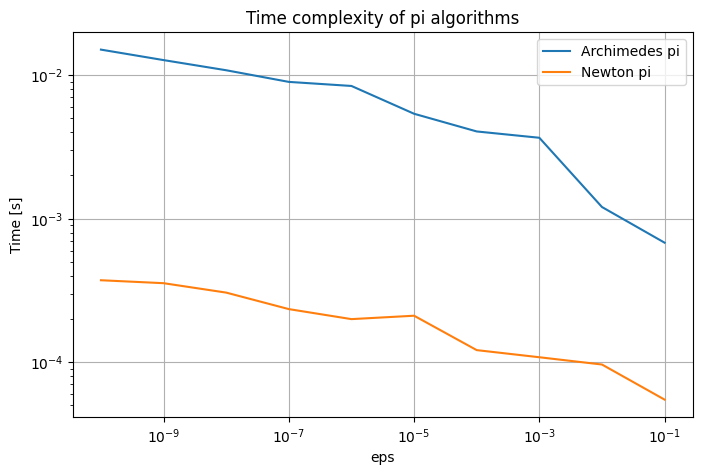

In [34]:
import numpy as np
import time
import matplotlib.pyplot as plt

epss = np.logspace(-1, -10, 10)

archimedes_times = []
newton_times = []
for eps in epss:
    start = time.time()
    archimedes_pi(eps)
    archimedes_times.append(time.time() - start)

    start = time.time()
    newton_pi(eps)
    newton_times.append(time.time() - start)

plt.figure(figsize=(8, 5))
plt.plot(epss, archimedes_times, label='Archimedes pi')
plt.plot(epss, newton_times, label='Newton pi')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('eps')
plt.ylabel('Time [s]')
plt.title('Time complexity of pi algorithms')
plt.legend()
plt.grid()
plt.show()


In [19]:
%lprun -f newton_pi newton_pi(eps)

Timer unit: 1e-09 s

Total time: 0.0115167 s
File: /tmp/ipykernel_6069/1158795140.py
Function: newton_pi at line 49

Line #      Hits         Time  Per Hit   % Time  Line Contents
    49                                           def newton_pi(eps):
    50         1      17545.0  17545.0      0.2      a = D(0.5) * (D(1) / (2**3))
    51         1       5331.0   5331.0      0.0      pi_suma = D(1 / D(2 * 1 + 1)) * a
    52         1     496271.0 496271.0      4.3      pi_zbytek = ((-1) * odmocnina(D(3), eps)) / D(8) + D(1) / D(2)
    53         1        512.0    512.0      0.0      i = D(2)
    54       156      45345.0    290.7      0.4      while True:
    55       156    4007066.0  25686.3     34.8          a *= (D(2 * i - 3) / D(2 * i)) * D(1 / 4)
    56       156    5912503.0  37900.7     51.3          pi_suma += (D(1) / D(2 * i + 1)) * a
    57       156     370211.0   2373.1      3.2          odhad_pi = 12 * (pi_zbytek - pi_suma)
    58       156     584979.0   3749.9      5.1    

**Obdobně postupujte pro tyto funkce hledající prvočísla menší než `n`**
- pomocí profilování zjistěte, které části kódu jsou nejvíce výpočetně náročné
- proveďtě benchmarking pomocí `time.time` pro `eratosthenes_sieve` a `primes_test` pro různé hodnoty `n`
    - `n = 10, 100, 1000,  ... , 1000000`
    - výsledky zobrazte pomocí log-log grafu

In [30]:
import numpy as np

def eratosthenes_sieve(n):
    sieve = np.arange(1, n + 1)
    sieve[0] = 0
    for i in range(2, int(np.sqrt(n)) + 1):
        if sieve[i - 1] != 0:
            sieve[i**2 - 1:n:i] = 0
    return np.where(sieve)[0] + 1

def primes_test(n):
    primes = [2]
    i = 3
    while i < n:
        sqrt = np.sqrt(i)
        for p in primes:
            if i % p == 0:
                break
            if p > sqrt:
                primes.append(i)
                break
        i += 2
    return np.array(primes)

n = 100000
print(eratosthenes_sieve(n))
print(primes_test(n))

[    2     3     5 ... 99971 99989 99991]
[    2     3     5 ... 99971 99989 99991]


In [28]:
%lprun -u 1e-06 -f eratosthenes_sieve eratosthenes_sieve(n)

Timer unit: 1e-06 s

Total time: 0.00170556 s
File: /tmp/ipykernel_6069/927055408.py
Function: eratosthenes_sieve at line 3

Line #      Hits         Time  Per Hit   % Time  Line Contents
     3                                           def eratosthenes_sieve(n):
     4         1        401.8    401.8     23.6      sieve = np.arange(1, n + 1)
     5         1          4.1      4.1      0.2      sieve[0] = 0
     6       316         93.4      0.3      5.5      for i in range(2, int(np.sqrt(n)) + 1):
     7       315        145.3      0.5      8.5          if sieve[i - 1] != 0:
     8        65        662.2     10.2     38.8              sieve[i**2 - 1:n:i] = 0
     9         1        398.8    398.8     23.4      return np.where(sieve)[0] + 1

In [31]:
%lprun -u 1e-06 -f primes_test primes_test(n)

Timer unit: 1e-06 s

Total time: 0.572487 s
File: /tmp/ipykernel_6069/3526370002.py
Function: primes_test at line 11

Line #      Hits         Time  Per Hit   % Time  Line Contents
    11                                           def primes_test(n):
    12         1          0.9      0.9      0.0      primes = [2]
    13         1          0.3      0.3      0.0      i = 3
    14     50000      11662.3      0.2      2.0      while i < n:
    15     49999      76023.6      1.5     13.3          sqrt = np.sqrt(i)
    16    704028     130003.9      0.2     22.7          for p in primes:
    17    704028     162908.3      0.2     28.5              if i % p == 0:
    18     40408       7963.4      0.2      1.4                  break
    19    663620     167006.1      0.3     29.2              if p > sqrt:
    20      9591       3189.2      0.3      0.6                  primes.append(i)
    21      9591       1974.0      0.2      0.3                  break
    22     49999      11433.6      0

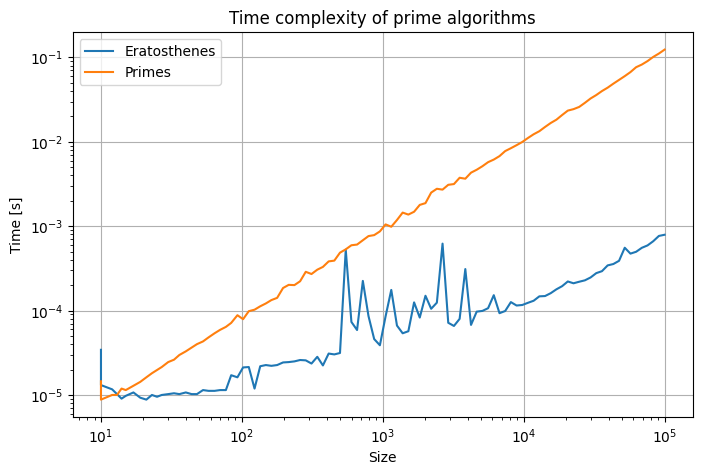

In [37]:
sizes_to_compute = np.logspace(1, 5, 100).astype(int)

timings_eratosthenes = []
timings_primes = []

for size in sizes_to_compute:
    start = time.time()
    eratosthenes_sieve(size)
    timings_eratosthenes.append(time.time() - start)

    start = time.time()
    primes_test(size)
    timings_primes.append(time.time() - start)

plt.figure(figsize=(8, 5))
plt.plot(sizes_to_compute, timings_eratosthenes, label='Eratosthenes')
plt.plot(sizes_to_compute, timings_primes, label='Primes')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Size')
plt.ylabel('Time [s]')
plt.title('Time complexity of prime algorithms')
plt.legend()
plt.grid()
plt.show()

## Numba

1. Použijte Numbu pro zrychlení hledání prvočísel (obě funkce), porovnejte časy s původními funkcemi, proveďte benchmarking podobně jako v předchozím případě

2. Použijte Numba.stencil pro aproximaci difuze 2D pole v čase
    - difuzní kernel bude počítat změny v hodnotách na základě rozdílů v okolních buňkách 
    $$u_{i,j} = u_{i,j} + \frac{\lambda}{\delta_t}\sum_{k,l \in \{(i,j-1), (i-1,j),\ldots\}} u_{k,l} - u_{i,j}$$

In [41]:
import numpy as np
from numba import stencil, jit
import matplotlib.pyplot as plt


lam = 1e-1
delta_t = 1

# Initialize the grid
N = 100  # Size of the grid (NxN)
grid = np.zeros((N, N))
grid[N // 2, N // 2] = 1000  # Initial concentration in the center

# TODO: naimplementujte funkci, která provede jeden krok difuze

def diffuse_step_dummy(grid):
    @stencil
    def diffuse_step(grid):
        lamt = lam/delta_t
        diffs = ((grid[0, 1]-grid[0,0])+
                (grid[0, -1]-grid[0,0])+
                (grid[1, 0]-grid[0,0])+
                (grid[-1, 0]-grid[0,0]))*lamt
        return grid[0, 0] + diffs
    return diffuse_step(grid)

diffuse_step_jit = jit(diffuse_step_dummy)

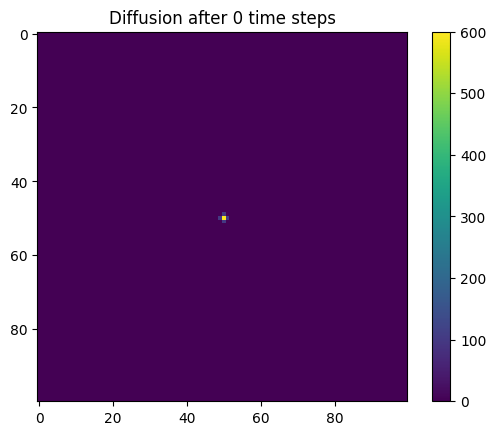

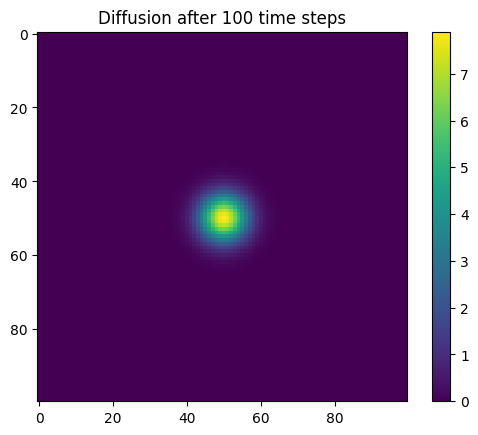

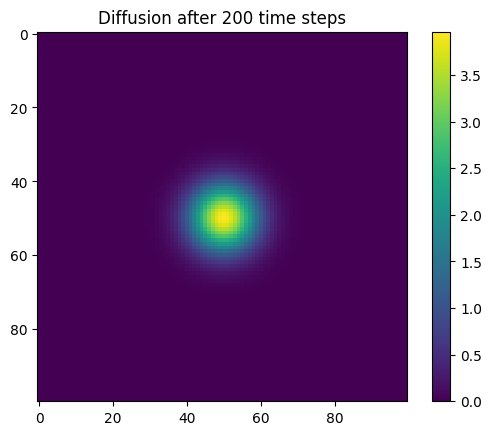

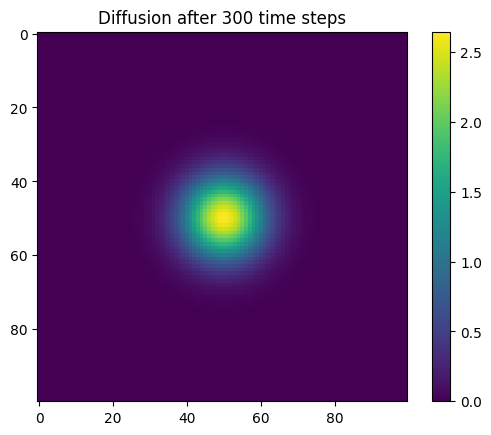

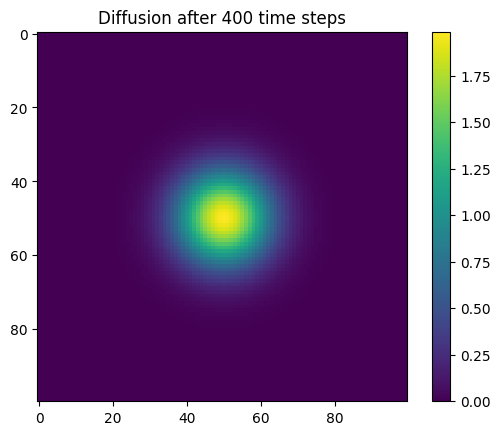

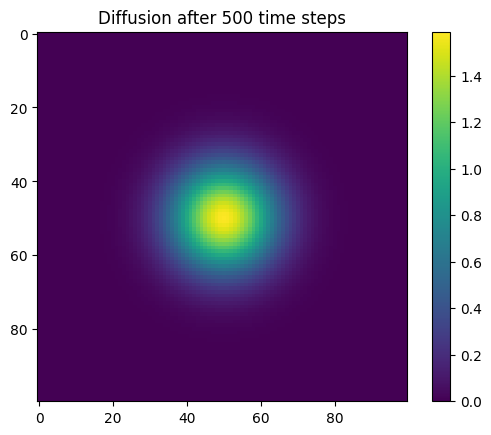

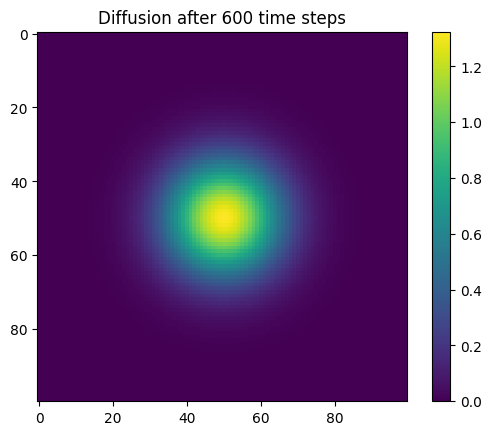

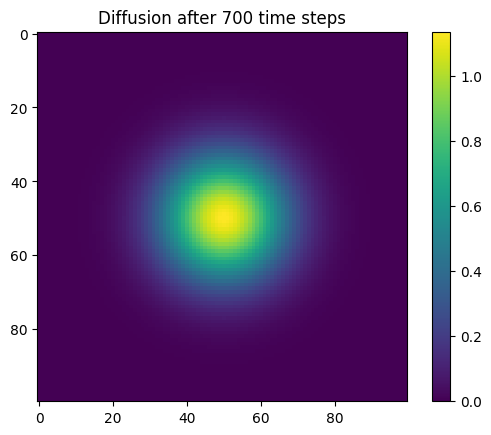

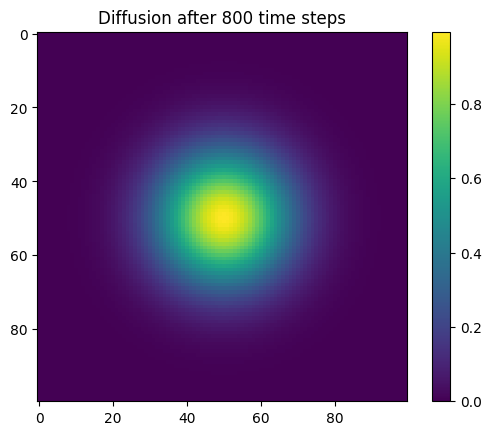

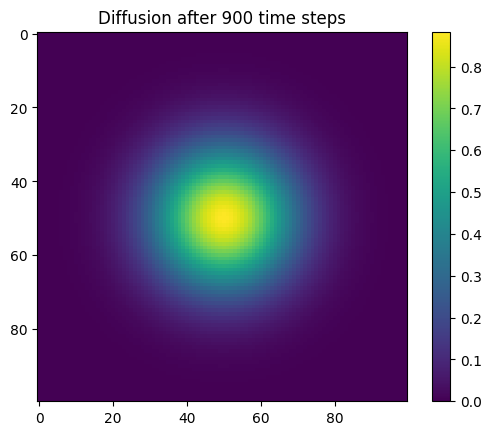

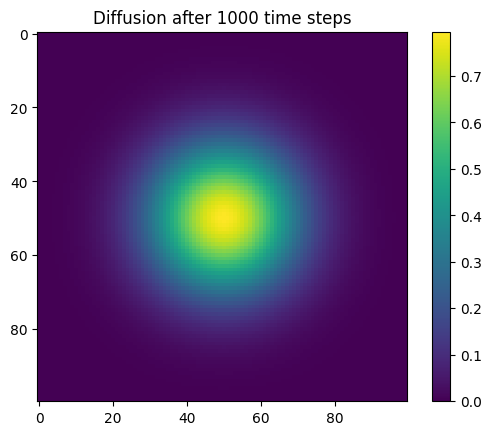

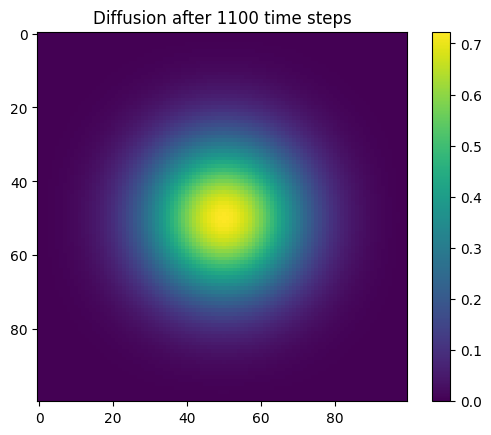

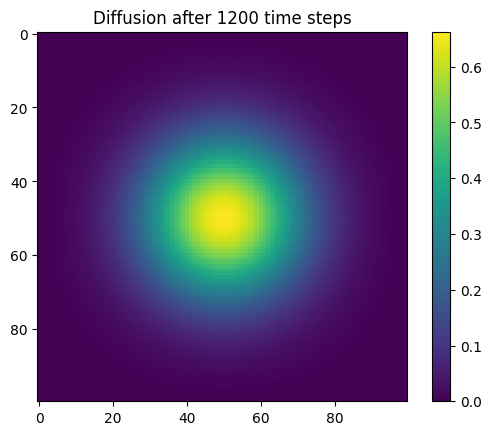

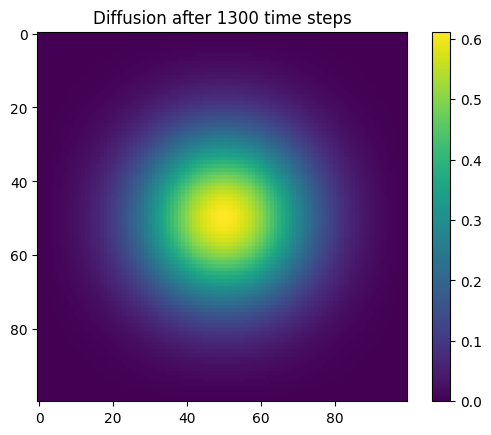

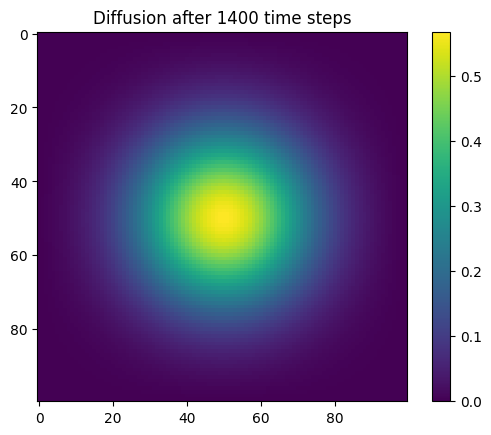

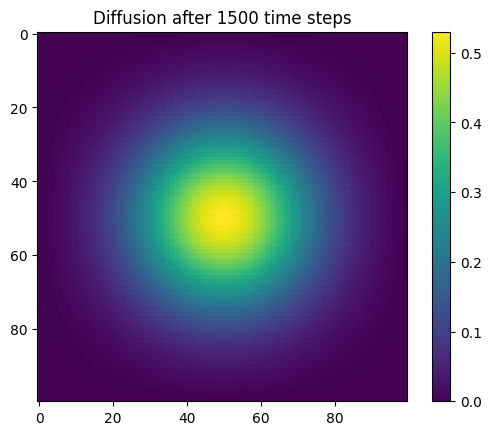

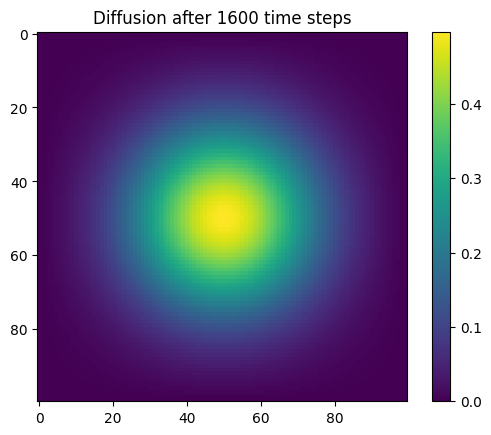

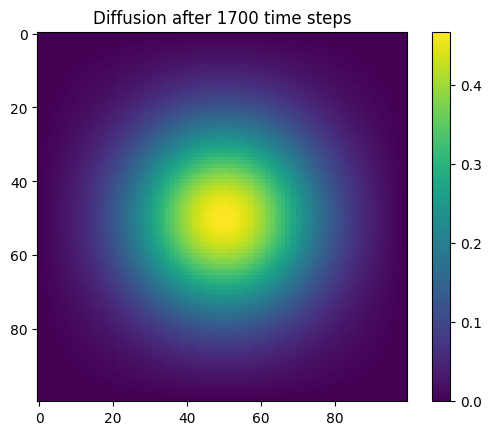

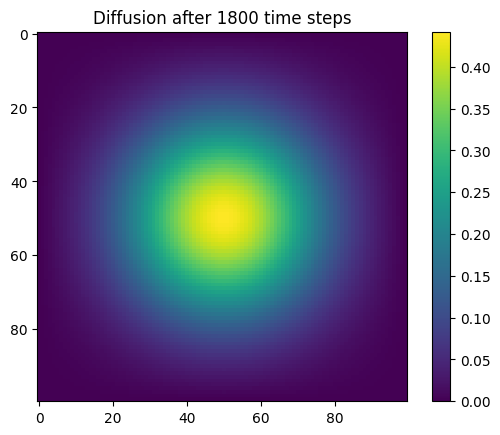

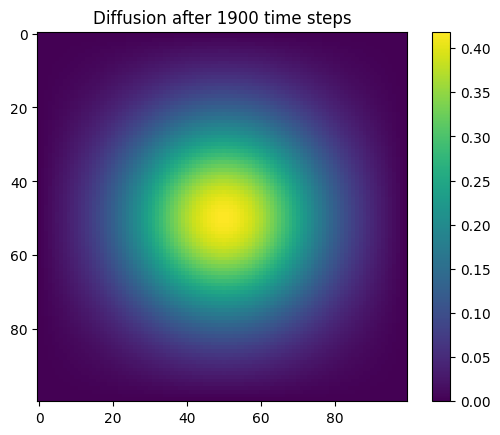

In [45]:
def diffuse(grid, num_steps):
    for time_step in range(num_steps):
        grid = diffuse_step_jit(grid)
        if time_step % 100 == 0:
            # Plotting the result
            plt.imshow(grid)
            plt.colorbar()
            plt.title(f'Diffusion after {time_step} time steps')
            plt.show()
    return grid


# Simulate diffusion
num_steps = 2000
result = diffuse(grid, num_steps)